# Face Recognition 臉部辨識


目前我們可以透過全世界最簡單的臉部辨識來偵測使用者，並且獲得臉部資料做進一步的管理。
在這個Case裡面我們會使用`dlib`最先進的深度學習工具，該工具可以幫助我們獲取精確度高達**99.38%**的驚人效果。

此外同樣提供一個簡單的`face_recognition` command line tool可以使用，可以在一連串的資料庫中，獲得最佳的效果。

# Features

**找出相片中的所有臉型**  
找出在照片中出現的所有臉
![FaceInPhoto](https://cloud.githubusercontent.com/assets/896692/23625227/42c65360-025d-11e7-94ea-b12f28cb34b4.png)

```python
import face_recognition
image = face_recognition.load_image_file("your_file.jpg")
face_locations = face_recognition.face_locations(image)
```

**找出圖片的臉型，並且替他增加特徵(畫圖)**
找出圖片中每一個人的眼睛、鼻子、嘴巴以及顴骨，並且繪製出來
![繪製特徵](https://cloud.githubusercontent.com/assets/896692/23625282/7f2d79dc-025d-11e7-8728-d8924596f8fa.png)

```python
import face_recognition
image = face_recognition.load_image_file("your_file.jpg")
face_landmarks_list = face_recognition.face_landmarks(image)
```

當我們能夠找出人的面部特徵將可以協助我們在很多方面的應用，例如:人臉辨識、面部修容，例如美圖秀秀就是非常好的範例....

![化妝](https://cloud.githubusercontent.com/assets/896692/23625283/80638760-025d-11e7-80a2-1d2779f7ccab.png)

**找到照片中的人物**  
辨識出現在照片中的人物  
![是誰](https://cloud.githubusercontent.com/assets/896692/23625229/45e049b6-025d-11e7-89cc-8a71cf89e713.png)

```python
import face_recognition
known_image = face_recognition.load_image_file("biden.jpg")
unknown_image = face_recognition.load_image_file("unknown.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)
```


In [15]:
import face_recognition

from PIL import Image, ImageDraw
from IPython.display import display,Image as IpythonIM


image = face_recognition.load_image_file("./assets/蔡英文.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations,"# x座標 y座標 長 寬")

[(152, 784, 259, 677)] # x座標 y座標 長 寬


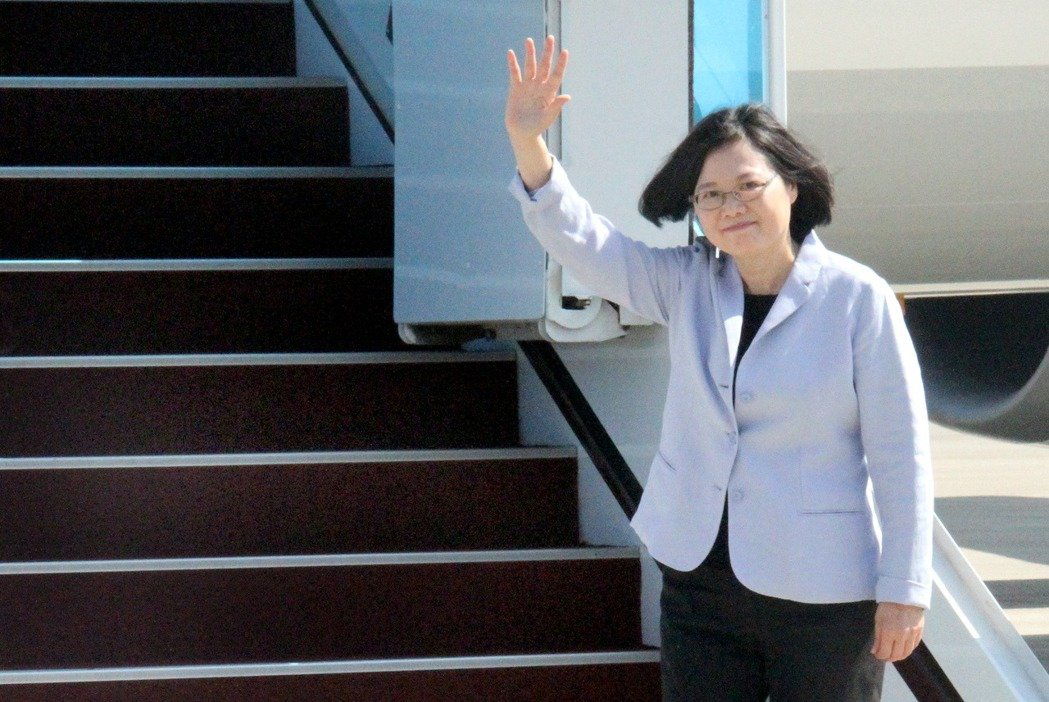

In [22]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("./assets/蔡英文.jpg")
display(Image.fromarray(image))

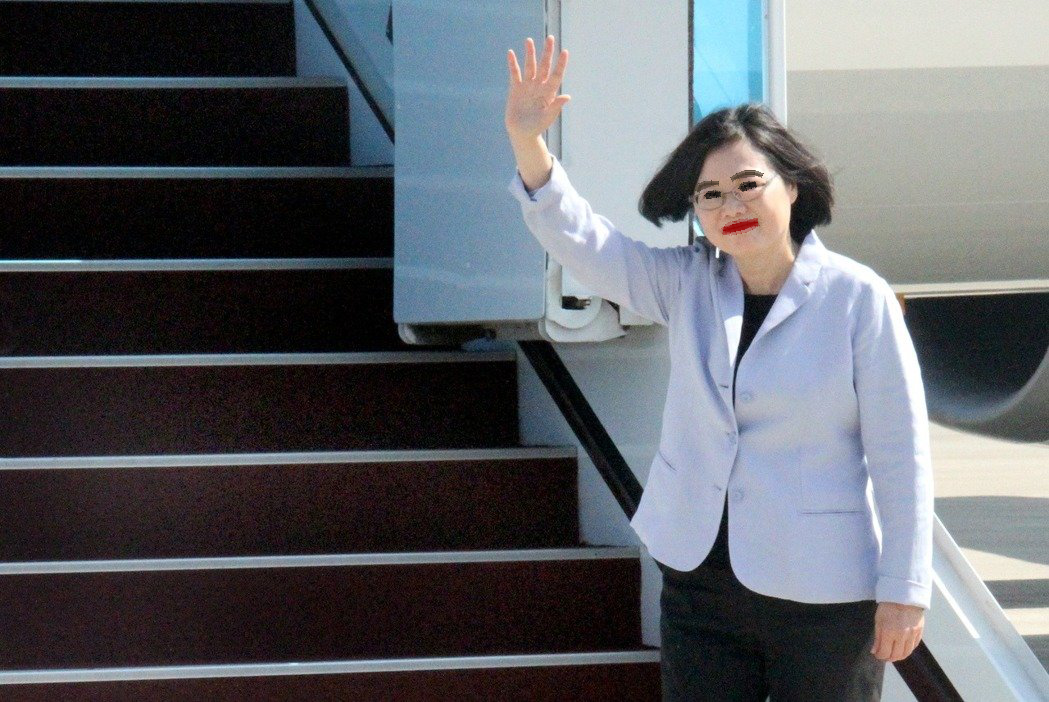

In [23]:

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image, 'RGBA')
for face_landmarks in face_landmarks_list:


    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)
    
display(pil_image)

# 如何安裝套件
